## Linear Regression 
#### Univariant Linear Regression, from scratch.

#### AI Saturday Lagos Begineers Class (Instructors: `Tejumade Afonja`, `Kenechi Dukor`, `Ifeanyi Igwegbe George`)
This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning)

NOTE: You will notice slight modification on the codes which makes it a bit different from what we practiced in class. Please do not get confused.

The whole concept remains the same, i only made the codes shorter.

In [1]:
# Libraries required for this practice 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

The data we will be using is a .txt file which contains a list of population for different cities and their corresponding profit.

The values on the first column contains the population of the cities and the values of the second column contains the corresponding profits, in 10,000's, seperated by a comma..

The goal of this exercise is to use linear regression and the optimization technique to generate a model that will predcit reasonable estimate of a city's profit when it is supplied the city's population.

In [2]:
# Using pandas to view the data
data = pd.read_csv("ex1data1.txt", sep=',', header = None)
data.columns=["Population of city in 10,000","Profit in $10,000"]

In [3]:
# this will show the first five data in the dataframe
data.head()

,"Population of city in 10,000","Profit in $10,000"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# Lets convert values of the pandas dataframe into a numpy array
data = data.values

You can also convert the data in to a numpy array without needing to go through pandas. Use the code below

`data = np.loadtxt("ex1data1.txt", delimiter=',')`

In [5]:
print(data.shape) 

(97, 2)


We have 97 training examples and one independent variable `x` on the first column and one dependent variable `y` on the second column

**Recall:**
- Our untrained model is given by: ![title](img/model.gif)
    
- Which you can also be written as ![title](img/model2.gif)

where:
- `y` is the ground truth or output
- `x` is the input values
- `theta` is the weight or parameters that needs to learn


Beacuse the coefficient of `theta` is `x` and `1`, we want to create a `97 x 2` matrix that contains the input values on the first column and ones in the second column

In [6]:
x = np.c_[data[:,0], np.ones(data.shape[0])] 

Similarly, we want to create a row vector with a dimension of `97 x 1` for all the output values in our dataset

In [7]:
y = np.c_[data[:,1]]

### Data Visualization

Text(0, 0.5, 'Profit in $10,000')

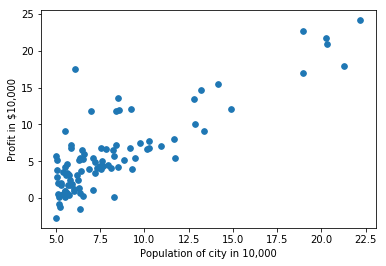

In [8]:
# Lets plot the data to see how they correlate.
plt.scatter(x[:,0], y, s=32, marker='o')
plt.xlabel("Population of city in 10,000")
plt.ylabel("Profit in $10,000")

Notice that there is a positive correlation between the two data. This means that we can develop a model that will be able to make reasonable predictions

### Training 

Recall from the class, the process to training a linear regression model is as follow.

We want to find the appropriate value of `theta` that will give us a good estimate of a city's profit if lthe city's population is supplied.

To do this, 
- We want to start with a random value of `theta` to generate a hypothesis
![title](img/model3.gif)

- Then continually correct values of `theta` until the deviation of the hypothesis/prediction `h` from the ground-truth `y` is greatly reduced

**Note:** 
- Matrix multiplication was utilized for the calculation?. 

In [9]:
def train(x, y):
    iteration = 2500
    # For this practice are initiallizing are theta with values of zero.
    theta = [[0],[0]]
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x)
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)

        print("The cost function is ", cost_function[i])
        
    return theta, cost_function

But how do we check the error like we defined above?

Remember the error formular (cost function)? 
![title](img/model44.gif)

where:
- `m` is the number of training example
- `x` is the input data
- `h` is the hypothesis
- `y` is the prediction

The equation tries to find the square error between the ground truth and the prediction.


In [10]:
def cost(x, theta):
    m = x[:,0].size
    h = x @ theta
    return 0.5*np.sum(np.square(h - y))/m

Now that we are able to get a sense of the error, how do we update how weight (theta) such that is predicts better?

Like we discussed in class, gradient descent algorithim will be used for this purpose.

The general formular for gradient is given below:
![title](img/model6.gif)
which can be differentiated to give:
![title](img/model5.gif)
where
- alpha is the learning rate

ie: we continually update the weight(theta) by taking steps(alpha) for the derived gradient of the error until we have sufficiently minimized theta.

In [11]:
def update_weight(h, theta, x):
    m = x[:,0].size
    alpha = 0.01
    theta = theta - alpha * (1/m * (x.T @ (h - y)))
    return theta


Now, lets pass in our data and train.

In [12]:
theta, cost_values = train(x, y)

The cost function is  6.737190464870006
The cost function is  5.931593568604956
The cost function is  5.901154707081388
The cost function is  5.895228586444221
The cost function is  5.89009494311733
The cost function is  5.885004158443647
The cost function is  5.879932480491418
The cost function is  5.874879094762575
The cost function is  5.869843911806386
The cost function is  5.8648268653129305
The cost function is  5.859827889932181
The cost function is  5.85484692057229
The cost function is  5.849883892376588
The cost function is  5.844938740722034
The cost function is  5.840011401218361
The cost function is  5.8351018097072265
The cost function is  5.830209902261388
The cost function is  5.825335615183863
The cost function is  5.820478885007099
The cost function is  5.815639648492154
The cost function is  5.81081784262787
The cost function is  5.806013404630044
The cost function is  5.801226271940628
The cost function is  5.796456382226899
The cost function is  5.791703673380653
T

The cost function is  4.579507770114606
The cost function is  4.579138439940198
The cost function is  4.5787704400717635
The cost function is  4.578403765717618
The cost function is  4.5780384121033375
The cost function is  4.577674374471689
The cost function is  4.577311648082583
The cost function is  4.576950228212997
The cost function is  4.576590110156924
The cost function is  4.5762312892253085
The cost function is  4.575873760745979
The cost function is  4.575517520063602
The cost function is  4.575162562539603
The cost function is  4.574808883552121
The cost function is  4.574456478495942
The cost function is  4.574105342782438
The cost function is  4.57375547183951
The cost function is  4.573406861111529
The cost function is  4.573059506059272
The cost function is  4.572713402159866
The cost function is  4.572368544906733
The cost function is  4.572024929809526
The cost function is  4.571682552394068
The cost function is  4.5713414082023025
The cost function is  4.5710014927922

The cost function is  4.484438327347678
The cost function is  4.484411431819744
The cost function is  4.484384633167951
The cost function is  4.484357931043356
The cost function is  4.484331325098271
The cost function is  4.484304814986266
The cost function is  4.484278400362154
The cost function is  4.484252080881994
The cost function is  4.484225856203082
The cost function is  4.48419972598395
The cost function is  4.4841736898843605
The cost function is  4.484147747565299
The cost function is  4.484121898688973
The cost function is  4.4840961429188075
The cost function is  4.48407047991944
The cost function is  4.484044909356716
The cost function is  4.484019430897684
The cost function is  4.483994044210589
The cost function is  4.483968748964877
The cost function is  4.483943544831179
The cost function is  4.483918431481318
The cost function is  4.483893408588291
The cost function is  4.483868475826285
The cost function is  4.483843632870647
The cost function is  4.483818879397901


The cost function is  4.477470027946604
The cost function is  4.477468231830979
The cost function is  4.477466442184859
The cost function is  4.477464658984943
The cost function is  4.477462882208009
The cost function is  4.477461111830922
The cost function is  4.4774593478306315
The cost function is  4.4774575901841684
The cost function is  4.477455838868647
The cost function is  4.4774540938612635
The cost function is  4.477452355139294
The cost function is  4.477450622680102
The cost function is  4.477448896461128
The cost function is  4.477447176459894
The cost function is  4.477445462654007
The cost function is  4.477443755021149
The cost function is  4.477442053539086
The cost function is  4.477440358185662
The cost function is  4.477438668938805
The cost function is  4.477436985776517
The cost function is  4.477435308676884
The cost function is  4.477433637618064
The cost function is  4.477431972578304
The cost function is  4.47743031353592
The cost function is  4.47742866046931

In [13]:
cost_values

array([6.73719046, 5.93159357, 5.90115471, ..., 4.47714649, 4.47714586,
       4.47714523])

In [14]:
# Now, lets see our trained weights
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [ 1.18864349 -3.85208068]


Lets visualize how or error reduced during the iteration. This is the power of gradient descent. 

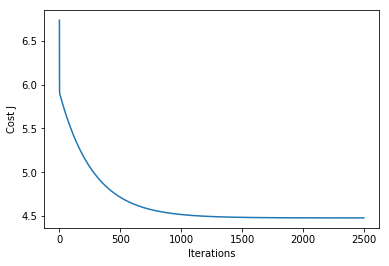

In [15]:
plt.plot(cost_values)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

Notice that at the `1500th iteration`, the model doesnt really change anymore. You should actually stop the iteration at that time and save cost of processing

## Testing

Lets see our regression line.
Note: YOU DON'T NEED TO COUNT THE NUMBER OF DATA POINT THAT YOUR LINE SEPERATES; lol!

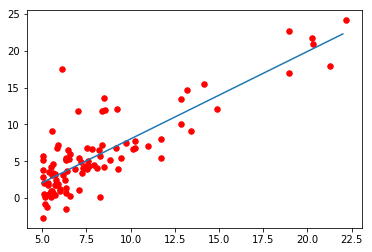

In [16]:
x_plot = np.arange(5,23)
y_plot = theta[0]*x_plot + theta[1]
# Plot gradient descent
plt.scatter(x[:,0], y, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (Gradient descent)')

### Prediction

Here, I hard coded the learned weights in the model that we defined earlier.
![Title](img/model.gif)

In [17]:
def predict():
    input_ = float(input("Input the population size/10000: "))
    print("For a population of ", input_, ", the profit is $", ((input_ * 1.18864349) - 3.85208068) * 10000)

In [18]:
predict()

Input the population size/10000: 5.5
For a population of  5.5 , the profit is $ 26854.585150000003


We could even find our input based if we have the output, although it is not realistic in this case

In [19]:
def predict_inverse():
    input_ = float(input("Input the Profit size: "))
    print("For a profit of ", input_, " the population is ", (((input_ / 10000) + 3.85208068) / 1.18864349)*10000 )

In [20]:
predict_inverse()

Input the Profit size: 26854.585150000003
For a profit of  26854.585150000003  the population is  55000.0


### Assignment:

1. Use `scikit-learn` to develop a linear regression model using the same dataset in this practice and compare result.
2. Explore the internet for an univariant dataset and use this algorithim to train a linear regression model. Use `scikit-learn` too

Assignment is due for submission on `29/03/2019`.

Summission link will be posted on the `WhatsApp Class Group`